Can we get dvs from the UVB balmer lines?

In [130]:
#first get the python modules we need
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.convolution import convolve, Box1DKernel
from astropy.table import Table
import astropy.units as u
from astropy.modeling import models, fitting
from scipy.stats import chisquare as chisq

#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [3]:
path = '/home/david/work/1144_lt/spectra/nicola_2/WDJ114404.76+052951.77/' #note the / on the end

uvbpath = path + 'UVB/'
sp = glob.glob(uvbpath+'*.csv')
merge = glob.glob(uvbpath+'*merged.csv')[0]
sp.remove(merge)
len(sp)

33

In [4]:
smooth = 7

In [5]:
"""
for s in sp:
        w, f, e = np.loadtxt(s, unpack=True, delimiter=',')
        f = convolve(f,Box1DKernel(smooth))
        plt.plot(w,f)
        
    
#plt.xlim(4800, 4900)
plt.ylim(0, 1.5e-15)"""

"\nfor s in sp:\n        w, f, e = np.loadtxt(s, unpack=True, delimiter=',')\n        f = convolve(f,Box1DKernel(smooth))\n        plt.plot(w,f)\n        \n    \n#plt.xlim(4800, 4900)\nplt.ylim(0, 1.5e-15)"

Cross-correlation? Find the best spectrum...

In [6]:
#w, f, e = np.loadtxt(sp[0], unpack=True, delimiter=',')
#f = convolve(f,Box1DKernel(smooth))
#plt.xlim(2900, 3100)
#plt.plot(w,f)
#plt.plot(w,e)
#cut everything over 3100

In [7]:
for i, s in enumerate(sp):
    w, f, e = np.loadtxt(s, unpack=True, delimiter=',')
    print(i, np.median(f[w>3100]/e[w>3100]))

0 31.619976002448297
1 31.576830516451164
2 28.28366827337544
3 28.49310885019313
4 33.79534688408572
5 27.525581022104042
6 31.017271316189046
7 32.35550805975043
8 19.371157142642446
9 32.74539052428673
10 30.570879635594842
11 30.393548814404525
12 30.219876049253706
13 19.837871485188998
14 31.18705634954776
15 30.162135093453415
16 30.482139597132893
17 19.066823890030772
18 18.728737669254713
19 29.682952346007696
20 31.308074681811647
21 30.052238440847646
22 33.17204503395703
23 30.29084835097676
24 28.104290157859495
25 30.80866394317895
26 31.696173721710785
27 34.09249560150426
28 30.657555509351347
29 29.12130765694037
30 29.459508445903456
31 29.770061788375905
32 30.154251293118975


In [8]:
best = sp[27]

In [9]:
from PyAstronomy.pyasl import crosscorrRV  as ccrv

In [42]:
tw, tf, te = np.loadtxt(sp[27], unpack=True, delimiter=',')
tw, tf, te = tw[tw>3100], tf[tw >3100], te[tw >3100]
#tf = convolve(tf,Box1DKernel(smooth))

In [11]:

"""dates  = []
dvs = []
for s in sp:
    date = fits.getheader(s[:-3]+'fits')['MJD-OBS'] + (150/86400)
    dates.append(date)
    if s == sp[27]:
        dvs.append(0.0)
    else:
        w, f, e = np.loadtxt(s, unpack=True, delimiter=',')
        mask = (w >3100)
        w, f, e = w[mask], f[mask], e[mask]
        f = convolve(f,Box1DKernel(smooth))
        rv, cc = ccrv(w, f, tw, tf, -100., 100., 1, skipedge=100)
        dv = rv[np.argmax(cc)]
        dvs.append(dv)
        plt.plot(rv, cc)

#plt.scatter(dates, dvs)"""
    

"dates  = []\ndvs = []\nfor s in sp:\n    date = fits.getheader(s[:-3]+'fits')['MJD-OBS'] + (150/86400)\n    dates.append(date)\n    if s == sp[27]:\n        dvs.append(0.0)\n    else:\n        w, f, e = np.loadtxt(s, unpack=True, delimiter=',')\n        mask = (w >3100)\n        w, f, e = w[mask], f[mask], e[mask]\n        f = convolve(f,Box1DKernel(smooth))\n        rv, cc = ccrv(w, f, tw, tf, -100., 100., 1, skipedge=100)\n        dv = rv[np.argmax(cc)]\n        dvs.append(dv)\n        plt.plot(rv, cc)\n\n#plt.scatter(dates, dvs)"

Ok that didn't work, looks like I need to fit each line.

In [12]:
fitter = fitting.LevMarLSQFitter()

def tiedfunc0(gg_init):
    mean = gg_init.mean_0.value
    return mean

lines = np.array([486.13615, 434.0462,410.174, 397.0072, 388.9049, 383.5384])
lines *= 10
#plt.figure(figsize=(6, 10))
#for line in lines:
 #   mask = (tw > line-30) & (tw < line+30)
  #  x = np.arange(len(tw[mask]))
  #  plt.plot(x, (tf[mask]-np.max(tf[mask]))*1e16)
  #  gg_init = models.Gaussian1D(-1.0, 0,10)+ models.Gaussian1D(-1.5, 0,0.5)+models.Gaussian1D(-0.5, 0,50)#+models.Const1D(1.0)
   # gg_init.mean_1.tied=tiedfunc0
   # gg_init.mean_2.tied=tiedfunc0
   # gg_fit = fitter(gg_init, x, (tf[mask]-np.max(tf[mask]))*1e16)
   # plt.plot(x, gg_fit(x))

Looks like we need to normalize it first...

In [41]:
#plt.plot(tw, tf)

In [14]:
sp[27]

'/home/david/work/1144_lt/spectra/nicola_2/WDJ114404.76+052951.77/UVB/WDJ114404.76+052951.77_SCI_SLIT_FLUX_MERGE1D_UVB_13.csv'

In [15]:
cregions = [3700, 3809, 3853, 3856,3920,3930,4022,4035,4185, 4205,4430,4760,4990,5540]

def mask_maker(x, pairs, include=True):
    """
    creates a mask for a spectrum that excudes between pairs from an array
    """
    b = pairs[::2]
    r = pairs[1::2]
    C = np.zeros_like(x,dtype='bool')
    for i in range(len(b)):
        C |= (x>b[i])&(x<r[i])
    if include:
        return ~C
    else:
        return C

#mask = mask_maker(tw, cregions, include=False)

In [16]:
"""tw1, tf1 = tw[mask], tf[mask] 
n_init = models.Polynomial1D(5)
n_fit = fitter(n_init, tw1, tf1)
plt.plot(tw, tf)
plt.plot(tw, n_fit(tw))"""

'tw1, tf1 = tw[mask], tf[mask] \nn_init = models.Polynomial1D(5)\nn_fit = fitter(n_init, tw1, tf1)\nplt.plot(tw, tf)\nplt.plot(tw, n_fit(tw))'

In [17]:
"""plt.figure(figsize=(6, 10))
for line in lines:
    mask = (tw > line-30) & (tw < line+30)
    x = np.arange(len(tw[mask]))
    nf = tf[mask]/n_fit(tw)[mask]
    plt.plot(x, nf)
    mid = len(x)/2
    gg_init = models.Gaussian1D(-0.3, mid,10)+ models.Gaussian1D(-0.5, mid,10)+models.Gaussian1D(-0.2, mid,50)+models.Const1D(1.0)
    gg_init.mean_1.tied=tiedfunc0
    gg_init.mean_2.tied=tiedfunc0
    gg_fit = fitter(gg_init, x, nf)
    plt.plot(x, gg_fit(x))"""

'plt.figure(figsize=(6, 10))\nfor line in lines:\n    mask = (tw > line-30) & (tw < line+30)\n    x = np.arange(len(tw[mask]))\n    nf = tf[mask]/n_fit(tw)[mask]\n    plt.plot(x, nf)\n    mid = len(x)/2\n    gg_init = models.Gaussian1D(-0.3, mid,10)+ models.Gaussian1D(-0.5, mid,10)+models.Gaussian1D(-0.2, mid,50)+models.Const1D(1.0)\n    gg_init.mean_1.tied=tiedfunc0\n    gg_init.mean_2.tied=tiedfunc0\n    gg_fit = fitter(gg_init, x, nf)\n    plt.plot(x, gg_fit(x))'

In [18]:
"""#plt.figure(figsize=(6, 10))
dvs = []
for i, line in enumerate(lines):
    plt.subplot(2,3, i+1)
    mask = (tw > line-30) & (tw < line+30)
    nw = tw[mask]
    nf = tf[mask]/n_fit(tw)[mask]
    plt.plot(nw, nf)
    gg_init = models.Gaussian1D(-0.3, line,10)+ models.Gaussian1D(-0.5, line,5)+models.Const1D(1.0)
    if i < 3:
        gg_init += models.Gaussian1D(-0.2, line,50)
        gg_init.mean_1.tied=tiedfunc0
        gg_init.mean_3.tied=tiedfunc0
    else:
        gg_init.mean_1.tied=tiedfunc0
    gg_fit = fitter(gg_init, nw, nf, maxiter=1000000)
    plt.plot(nw, gg_fit(nw))
    dv = (gg_fit[0].mean*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(line*u.AA)).value
    fit_e = np.sqrt(np.diag(fitter.fit_info['param_cov']))
   # print (gg_fit)
    dvs.append(dv)
print(dvs)
print(np.mean(dvs))
print(np.median(dvs))
print(np.std(dvs))"""

"#plt.figure(figsize=(6, 10))\ndvs = []\nfor i, line in enumerate(lines):\n    plt.subplot(2,3, i+1)\n    mask = (tw > line-30) & (tw < line+30)\n    nw = tw[mask]\n    nf = tf[mask]/n_fit(tw)[mask]\n    plt.plot(nw, nf)\n    gg_init = models.Gaussian1D(-0.3, line,10)+ models.Gaussian1D(-0.5, line,5)+models.Const1D(1.0)\n    if i < 3:\n        gg_init += models.Gaussian1D(-0.2, line,50)\n        gg_init.mean_1.tied=tiedfunc0\n        gg_init.mean_3.tied=tiedfunc0\n    else:\n        gg_init.mean_1.tied=tiedfunc0\n    gg_fit = fitter(gg_init, nw, nf, maxiter=1000000)\n    plt.plot(nw, gg_fit(nw))\n    dv = (gg_fit[0].mean*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(line*u.AA)).value\n    fit_e = np.sqrt(np.diag(fitter.fit_info['param_cov']))\n   # print (gg_fit)\n    dvs.append(dv)\nprint(dvs)\nprint(np.mean(dvs))\nprint(np.median(dvs))\nprint(np.std(dvs))"

In [49]:
fit_ranges = [[4600, 5500],[4200, 4500], [4025,4220], [3920,4040],[3855,3930], [3800,3865]]
#cregions = [3750, 3809, 3853, 3856,3920,3930,4022,4035,4185, 4205,4430,4760,4990,5500]
nmasks = [[4760,4990],[4205,4430],[4035,4185],[3930,4022],[3856,3920],[3815, 3850]]

In [35]:
def make_plot_spec(w, f, e, mask1, mask2): #cuts spectrum down to the bit to plot
    #mask = (w > 8450) & (w < 8480) | (w > 8520) & (w <8540) | (w > 8560) & (w< 8660) | (w > 8680) & (w < 8700) #mask out emmission lines
    w1, f1 = w[mask1], f[mask1]
    n_init = models.Polynomial1D(3)
    n_fit = fitter(n_init, w1, f1)
    #mask = (w > 8450) & (w < 8700)
    w1, f1, e1 = w[mask2], f[mask2], e[mask2]
    nf = f1/n_fit(w1)
    ne = e1/n_fit(w1)
    smooth = 10
    nf = convolve(nf,Box1DKernel(smooth))
    ne = convolve(ne,Box1DKernel(smooth))/smooth**0.5
    return w1,nf, ne
    
    
def dv_average(dvs, es):
    """
    Returns a variance-weighted dv with standard error of the weighted mean (variance weights, scale corrected).
    
    """
    weights = 1 / (es**2)
    dv = np.average(dvs, weights = weights)
    var = 1 / np.sum(weights)
    rcs = np.sum((((dv - dvs)**2) * weights)) / (len(dvs)-1) #reduced chi-squared
    error = (var * rcs)**0.5
    return dv, error

[44.468351917738005, 75.8544193933843, 111.8090729018645, 162.38819299872227]
98.63000930292728
93.8317461476244
43.84919136075908


(73.7569205055945, 20.5343856796605)

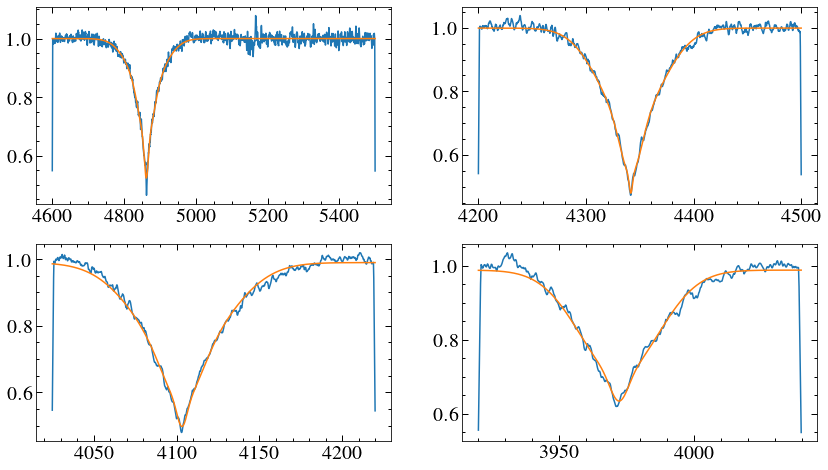

In [61]:
dvs = []
dves = []
plt.figure(figsize=(14, 8))
for i, line in enumerate(lines[0:4]):
    plt.subplot(2,2, i+1)
    
    mask1 = (tw >fit_ranges[i][0]) & (tw < nmasks[i][0]) | (tw >nmasks[i][1]) & (tw < fit_ranges[i][1])
    mask2 = (tw >fit_ranges[i][0]) & (tw < fit_ranges[i][1])
    nw, nf, ne = make_plot_spec(tw, tf, te, mask1, mask2)
    plt.plot(nw, nf)
    gg_init = models.Gaussian1D(-0.3, line,10)+ models.Gaussian1D(-0.5, line,1)+models.Const1D(1.0)
    if i < 3:
        gg_init += models.Gaussian1D(-0.2, line,50)
        gg_init.mean_1.tied=tiedfunc0
        gg_init.mean_3.tied=tiedfunc0
    else:
        gg_init.mean_1.tied=tiedfunc0
    gg_fit = fitter(gg_init, nw, nf, maxiter=100000)
    plt.plot(nw, gg_fit(nw))
    dv = (gg_fit[0].mean*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(line*u.AA)).value
    fit_e = np.sqrt(np.diag(fitter.fit_info['param_cov']))
    #print (fit_e[1]/abs(line-gg_fit[0].mean))
    dvs.append(dv)
    dves.append(dv* fit_e[1]/abs(line-gg_fit[0].mean))
print(dvs)
print(np.mean(dvs))
print(np.median(dvs))
print(np.std(dvs))
dv_average(np.array(dvs), np.array(dves)) 

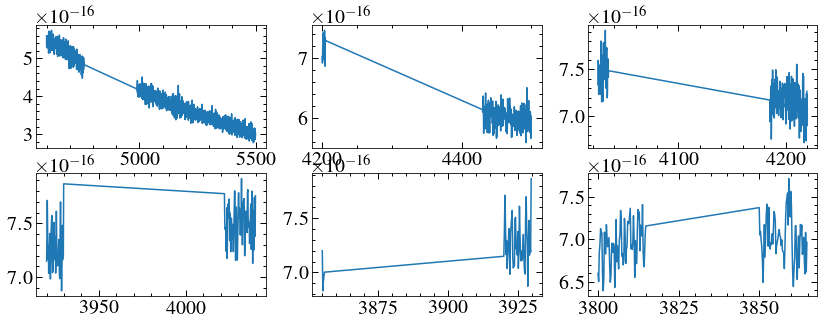

In [50]:
for i, line in enumerate(lines):
    plt.subplot(2,3, i+1)
    
    mask1 = (tw >fit_ranges[i][0]) & (tw < nmasks[i][0]) | (tw >nmasks[i][1]) & (tw < fit_ranges[i][1])
    plt.plot(tw[mask1], tf[mask1])

Maybe working, but with giant error bars? Try for all spectra...

/home/david/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in sqrt


<ErrorbarContainer object of 3 artists>

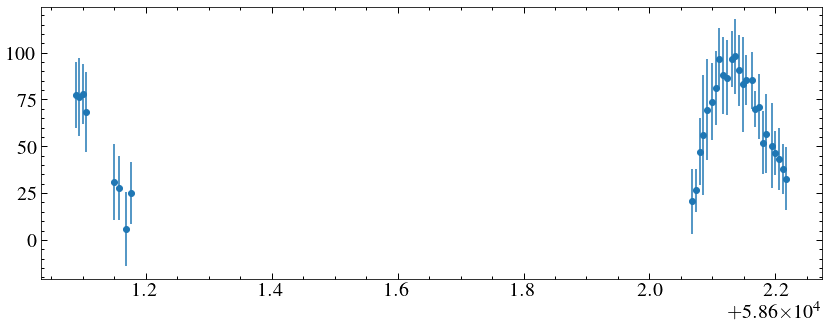

In [70]:
dates = []
dv_all = []
e_all = []
for s in sp:
    date = fits.getheader(s[:-3]+'fits')['MJD-OBS'] + (150/86400)
    dates.append(date)
    w, f, e = np.loadtxt(s, unpack=True, delimiter=',')
    dvs = []
    dves = []
  #  plt.figure(figsize=(14, 8))
    for i, line in enumerate(lines[0:4]):
    #    plt.subplot(2,2, i+1)

        mask1 = (w >fit_ranges[i][0]) & (w < nmasks[i][0]) | (w >nmasks[i][1]) & (w < fit_ranges[i][1])
        mask2 = (w >fit_ranges[i][0]) & (w < fit_ranges[i][1])
        nw, nf, ne = make_plot_spec(w, f, e, mask1, mask2)
     #   plt.plot(nw, nf)
        gg_init = models.Gaussian1D(-0.3, line,10)+ models.Gaussian1D(-0.5, line,1)+models.Const1D(1.0)
        if i < 3:
            gg_init += models.Gaussian1D(-0.2, line,50)
            gg_init.mean_1.tied=tiedfunc0
            gg_init.mean_3.tied=tiedfunc0
        else:
            gg_init.mean_1.tied=tiedfunc0
        gg_fit = fitter(gg_init, nw, nf, maxiter=100000)
     #   plt.plot(nw, gg_fit(nw))
        dv = (gg_fit[0].mean*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(line*u.AA)).value
        if fitter.fit_info['param_cov'] is None:
            dves.append(20)
        else: 
            fit_e = np.sqrt(np.diag(fitter.fit_info['param_cov']))
            dves.append(dv* fit_e[1]/abs(line-gg_fit[0].mean)) 
        #print (fit_e[1]/abs(line-gg_fit[0].mean))
        dvs.append(dv)
        

    dva, dve = dv_average(np.array(dvs), np.array(dves)) 
    dv_all.append(dva)
    e_all.append(dve)

plt.errorbar(dates, dv_all, yerr=e_all, ls='none', marker='o')

In [71]:
period = 4.226953752501198

<ErrorbarContainer object of 3 artists>

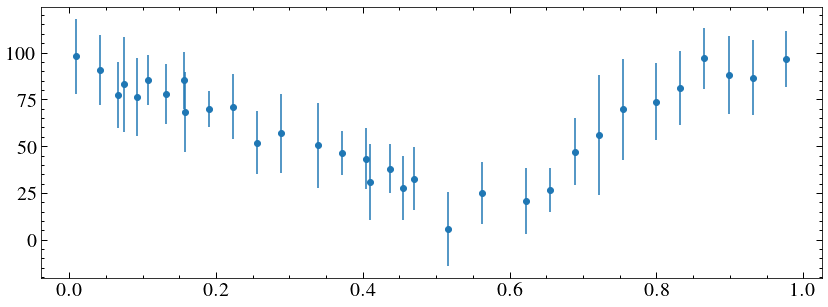

In [73]:
th = np.array(dates) *24
th_fold = th /period %1
plt.errorbar(th_fold, dv_all, yerr=e_all, ls='none', marker='o')

Model: CompoundModel1929
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1]
Components: 
    [0]: <Const1D(amplitude=20.)>

    [1]: <Sine1D(amplitude=50., frequency=1., phase=0.)>
Parameters:
       amplitude_0        amplitude_1    frequency_1       phase_1      
    ------------------ ----------------- ----------- -------------------
    59.142021360658056 33.07095712045928         1.0 0.23912941454968117
[1.58145211 2.113757   0.01099521]


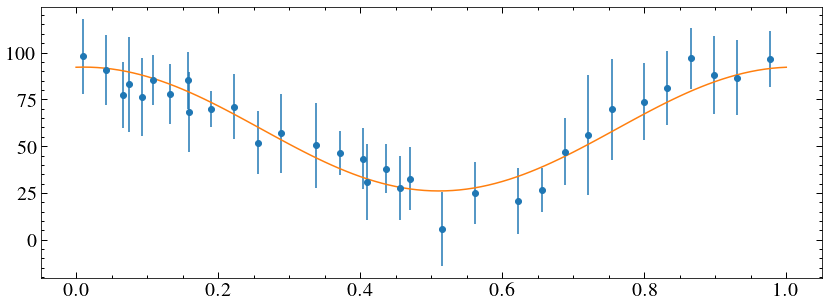

In [85]:
phase_t = np.arange(0,1.01, 0.01 )
abs_mod =  models.Const1D(20, bounds=dict(amplitude=[0, 100])) + models.Sine1D(amplitude=50, frequency=1, phase=0.0, bounds=dict(amplitude=[0, 100]), fixed=dict(frequency=1))
abs_fit = fitter(abs_mod, th_fold, dv_all, weights=1/np.array(e_all), maxiter=100000)
print(abs_fit)
plt.errorbar(th_fold, dv_all, yerr=e_all, ls='none', marker='o')
plt.plot(phase_t, abs_fit(phase_t))
fit_e = np.sqrt(np.diag(fitter.fit_info['param_cov']))
print(fit_e)

Same amplitude as from the h_alpha lines! Add the old spectrum:

In [87]:
old_path = '/home/david/work/1144_lt/spectra/SDSSJ1144_old/'
old_spec = glob.glob(old_path+'*UVB*.csv')[0]
old_date = fits.getheader(old_spec[:-3]+'fits')['MJD-OBS'] +(1400/86400)

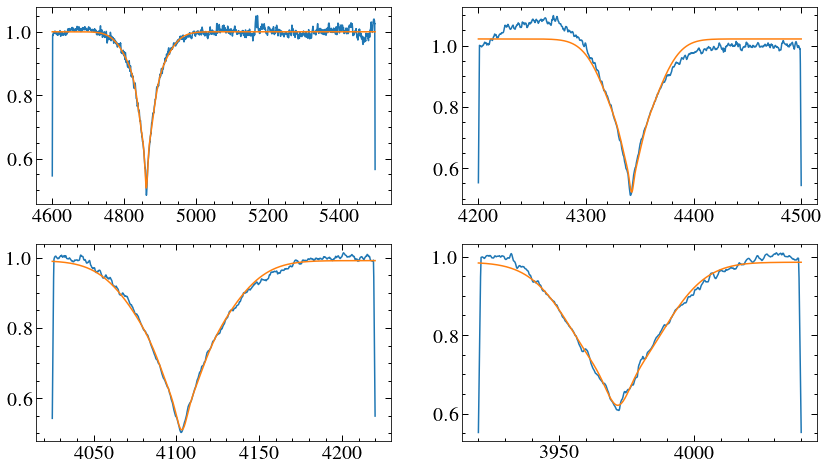

In [89]:
tw, tf, te = np.loadtxt(old_spec, unpack=True, delimiter=',')

dvs = []
dves = []
plt.figure(figsize=(14, 8))
for i, line in enumerate(lines[0:4]):
    plt.subplot(2,2, i+1)
    
    mask1 = (tw >fit_ranges[i][0]) & (tw < nmasks[i][0]) | (tw >nmasks[i][1]) & (tw < fit_ranges[i][1])
    mask2 = (tw >fit_ranges[i][0]) & (tw < fit_ranges[i][1])
    nw, nf, ne = make_plot_spec(tw, tf, te, mask1, mask2)
    plt.plot(nw, nf)
    gg_init = models.Gaussian1D(-0.3, line,10)+ models.Gaussian1D(-0.5, line,1)+models.Const1D(1.0)
    if i < 3:
        gg_init += models.Gaussian1D(-0.2, line,50)
        gg_init.mean_1.tied=tiedfunc0
        gg_init.mean_3.tied=tiedfunc0
    else:
        gg_init.mean_1.tied=tiedfunc0
    gg_fit = fitter(gg_init, nw, nf, maxiter=100000)
    plt.plot(nw, gg_fit(nw))
    dv = (gg_fit[0].mean*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(line*u.AA)).value
    fit_e = np.sqrt(np.diag(fitter.fit_info['param_cov']))
    #print (fit_e[1]/abs(line-gg_fit[0].mean))
    dvs.append(dv)
    dves.append(dv* fit_e[1]/abs(line-gg_fit[0].mean))

old_dv, old_e = dv_average(np.array(dvs), np.array(dves)) 

<ErrorbarContainer object of 3 artists>

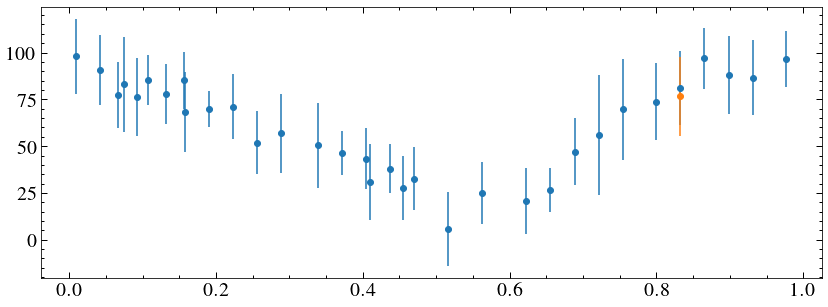

In [90]:
oldh = old_date *24
oldh_fold = oldh/period % 1
plt.errorbar(th_fold, dv_all, yerr=e_all, ls='none', marker='o')
plt.errorbar(oldh_fold, old_dv, yerr=old_e, ls='none', marker='o')

In [94]:
all_dates = np.append(old_date, dates)
all_dvs = np.append(old_dv, dv_all)
all_dves = np.append(old_e, e_all)
args = np.argsort(all_dates)
all_dates, all_dvs, all_dves = all_dates[args], all_dvs[args], all_dves[args]

(58600, 58605)

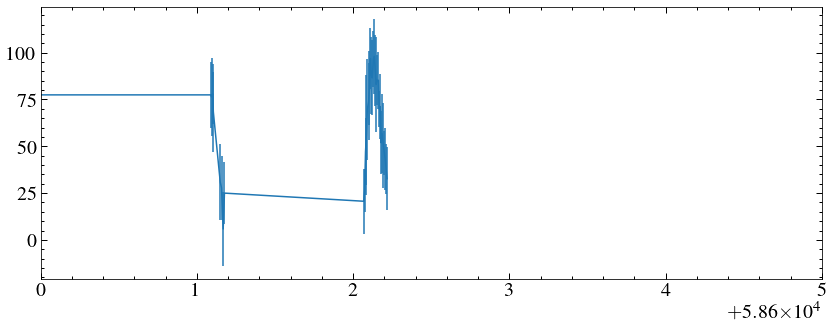

In [96]:
plt.errorbar(all_dates, all_dvs, yerr=all_dves)
plt.xlim(5600, 58605)

<ErrorbarContainer object of 3 artists>

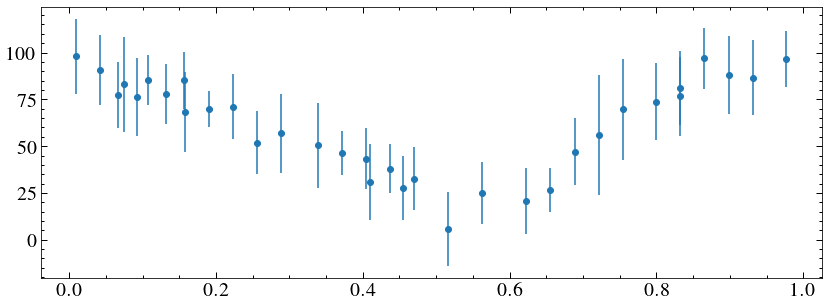

In [98]:
th = np.array(all_dates) *24
th_fold = th /period %1
plt.errorbar(th_fold, all_dvs, yerr=all_dves, ls='none', marker='o')

Phaseing looks out?

In [100]:
hab_dvs = Table.read('dv_lists/ha_ab_dvs.ecsv')
ta, dva, dvea = np.array(hab_dvs['MJD']), np.array(hab_dvs['VELOCITY']), np.array(hab_dvs['ERROR'])

<ErrorbarContainer object of 3 artists>

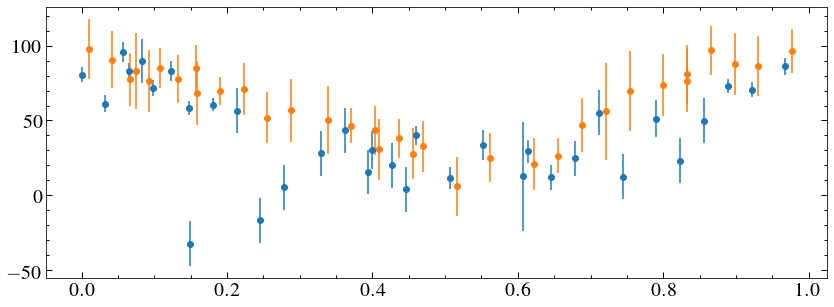

In [104]:
ta_fold = ta*24/period %1
plt.errorbar(ta_fold, dva, yerr=dvea, marker='o', ls='none')
plt.errorbar(th_fold, all_dvs, yerr=all_dves, ls='none', marker='o')

Timings off somewhere, but looks good!

(58602, 58602.5)

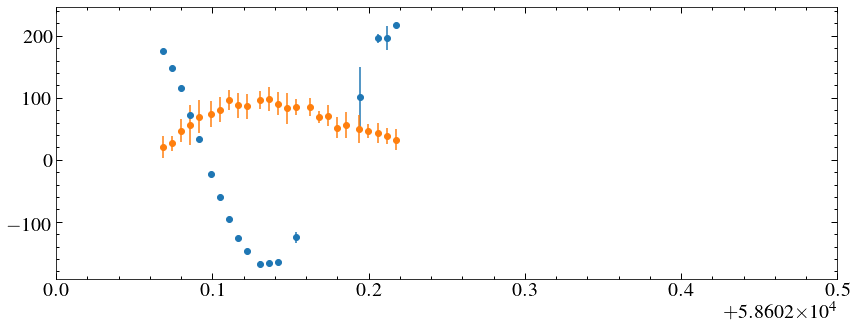

In [110]:
linepath = 'dv_lists/'
ca_dvs = Table.read(linepath+'ca_dvs.ecsv')
tc, dvc, dvec = np.array(ca_dvs['MJD']), np.array(ca_dvs['VELOCITY']), np.array(ca_dvs['ERROR'])
plt.errorbar(tc, dvc, yerr=dvec, ls='none', marker='o')
plt.errorbar(all_dates, all_dvs, yerr=all_dves, marker='o', ls='none')
plt.xlim(58602, 58602.5)

Oooh can I get a period out of the uv lines?

In [111]:
from astropy.timeseries import LombScargle

4.22512929372743


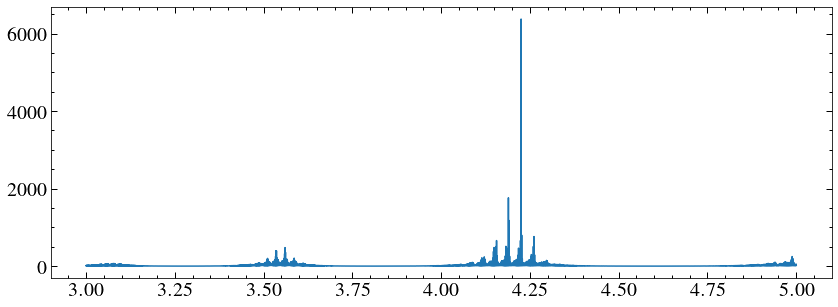

In [122]:
frequency, power = LombScargle(tc*24, dvc, dvec, normalization='model').autopower(minimum_frequency = 1/5, maximum_frequency = 1/3)
period = 1/frequency[np.argmax(power)]
print(period)
plt.plot(1/frequency, power)

#frequency, power = LombScargle(th, all_dvs, all_dves, normalization='model').autopower(minimum_frequency = 1/5, maximum_frequency = 1/3)
#period = 1/frequency[np.argmax(power)]
#print(period)
#plt.plot(1/frequency, power)

#plt.ylim(0, 500)

<ErrorbarContainer object of 3 artists>

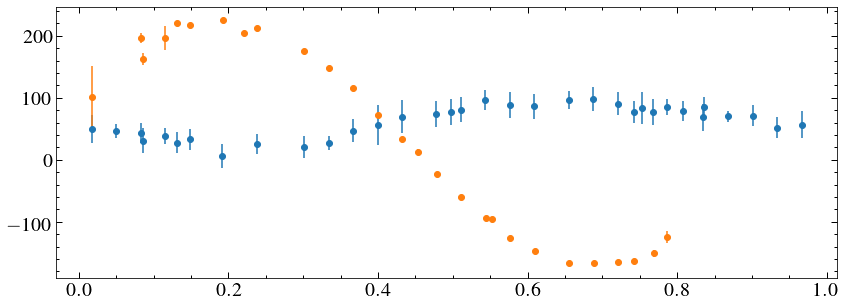

In [123]:
th_fold = th /period %1
tc_fold = tc*24 /period %1
plt.errorbar(th_fold, all_dvs, yerr=all_dves, ls='none', marker='o')
plt.errorbar(tc_fold, dvc, yerr=dvec, ls='none', marker='o')

Model: CompoundModel1941
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1]
Components: 
    [0]: <Const1D(amplitude=57.)>

    [1]: <Sine1D(amplitude=150., frequency=1., phase=0.)>
Parameters:
       amplitude_0        amplitude_1     frequency_1       phase_1      
    ------------------ ------------------ ----------- -------------------
    27.049767126215333 197.02635928181655         1.0 0.06205145017743449
[1.19279451 0.64111088 0.00119625]


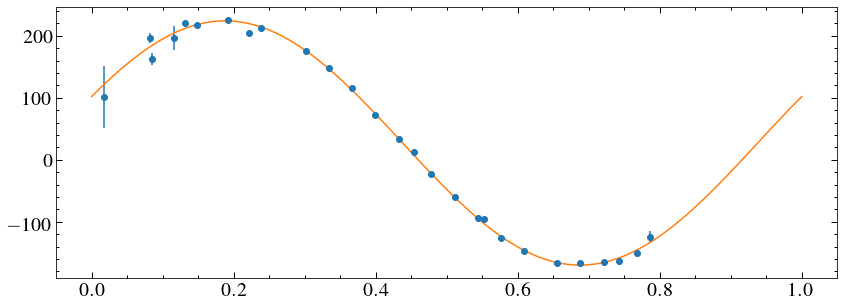

In [124]:
fitter = fitting.LevMarLSQFitter()
sine_mod =  models.Const1D(57, bounds=dict(amplitude=[0, 60])) + models.Sine1D(amplitude=150, frequency=1, bounds=dict(amplitude=[100, 200]), fixed=dict(frequency=1))
sine_fit = fitter(sine_mod, tc_fold, dvc, weights=1/dvec, maxiter=100000)
print(sine_fit)
plt.errorbar(tc_fold, dvc, yerr=dvec, marker='o', ls='none')
phase_t = np.arange(0,1.01, 0.01 )
plt.plot(phase_t, sine_fit(phase_t))
fit_e = np.sqrt(np.diag(fitter.fit_info['param_cov']))
print(fit_e)

3.7923836952485117
3.4798086790185607
3.4037496180071063
3.363576209906153
3.335589620500578
3.312681230001798
3.292334855874834
3.2735456325906296
3.2558673785742958
3.2390791864626465
Model: CompoundModel1941
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1]
Components: 
    [0]: <Const1D(amplitude=57.)>

    [1]: <Sine1D(amplitude=150., frequency=1., phase=0.)>
Parameters:
       amplitude_0       amplitude_1     frequency_1       phase_1      
    ----------------- ------------------ ----------- -------------------
    26.30924389540614 196.57915987158538         1.0 0.06106402187962933
[1.42156936 1.51454875 0.00171295]


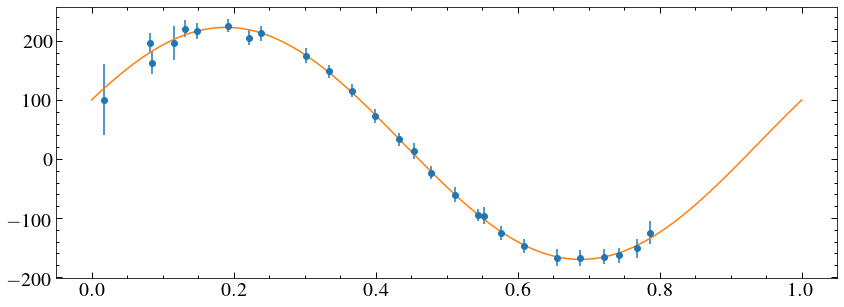

In [131]:
errs = np.array(ca_dvs['ERROR'])

iterate = True
i = 0
while iterate and i < 10:
    i +=1
    sine_fit = fitter(sine_mod, tc_fold, dvc, weights=1/errs, maxiter=100000)
    calc_dvs = sine_fit(tc_fold)
    rcs = chisq(dvc, f_exp=calc_dvs, axis = 0)[0]/3
    print (rcs)
    if rcs <= 1.0:
        iterate= False
    else:
        errs += 1.0

print(sine_fit)
plt.errorbar(tc_fold, dvc, yerr=errs, marker='o', ls='none')
phase_t = np.arange(0,1.01, 0.01 )
plt.plot(phase_t, sine_fit(phase_t))
fit_e = np.sqrt(np.diag(fitter.fit_info['param_cov']))
print(fit_e)

Model: CompoundModel1944
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1]
Components: 
    [0]: <Const1D(amplitude=20.)>

    [1]: <Sine1D(amplitude=50., frequency=1., phase=0.5)>
Parameters:
       amplitude_0       amplitude_1     frequency_1      phase_1      
    ----------------- ------------------ ----------- ------------------
    59.27226054706421 33.100568171017294         1.0 0.5622013280726033
[1.53962622 2.08763365 0.01060323]


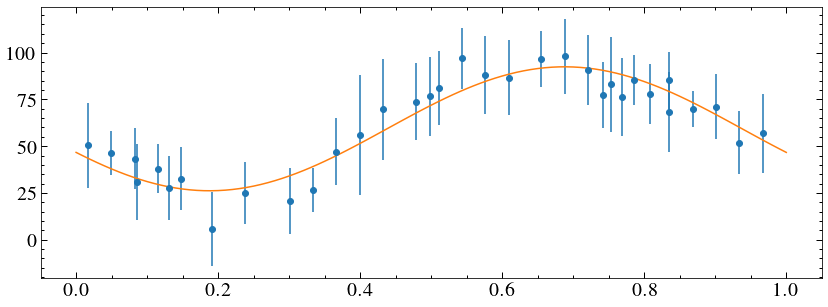

In [127]:
abs_mod =  models.Const1D(20, bounds=dict(amplitude=[0, 100])) + models.Sine1D(amplitude=50, frequency=1, phase=0.5, bounds=dict(amplitude=[0, 100]), fixed=dict(frequency=1))
abs_fit = fitter(abs_mod, th_fold, all_dvs, weights=1/all_dves, maxiter=100000)
print(abs_fit)
plt.errorbar(th_fold, all_dvs, yerr=all_dves, ls='none', marker='o')
plt.plot(phase_t, abs_fit(phase_t))
fit_e = np.sqrt(np.diag(fitter.fit_info['param_cov']))
print(fit_e)

In [133]:
ep = 0.2/period
m1 = 0.49 #Msun, from G+2015
m1e = 0.03
v1 = 33
v1e = v1*((2.1/v1)**2+ep**2)**0.5
v2 = 196.6
v2e = v2*((1.5/v2)**2+ep**2)**0.5
v1v2 = v1/v2
v1v2e = ((v1e/v1)**2+(v2e/v2)**2)**0.5
print(v1v2, v1v2e)
m2 = m1 * v1v2
m2e = m2 * (v1v2e**2+(m1e/m1)**2)**0.5
print (m2)
print(m2e)

0.167853509664293 0.09267772488599503
0.08224821973550357
0.009135699983472514


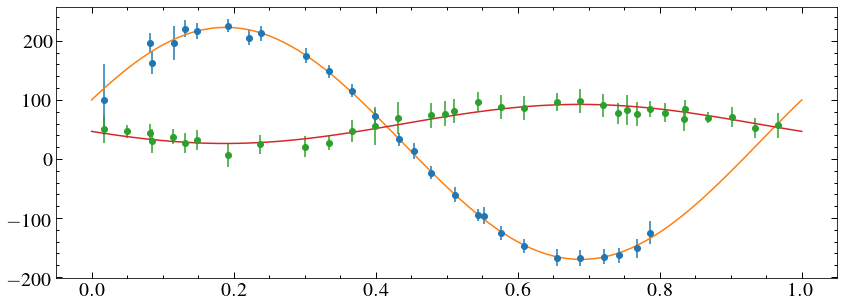

In [136]:
plt.errorbar(tc_fold, dvc, yerr=errs, marker='o', ls='none')
plt.plot(phase_t, sine_fit(phase_t))
plt.errorbar(th_fold, all_dvs, yerr=all_dves, ls='none', marker='o')
plt.plot(phase_t, abs_fit(phase_t))

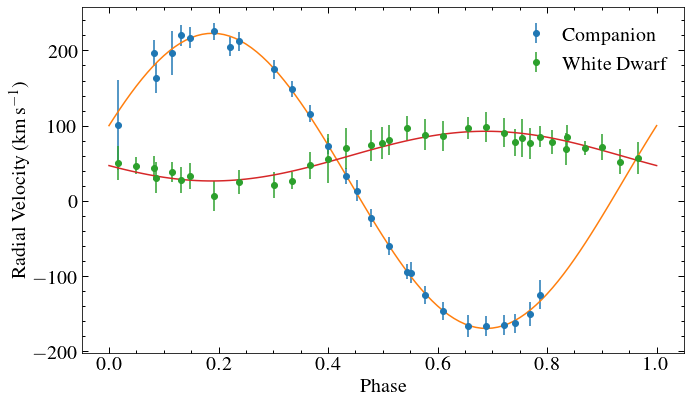

In [142]:
plt.figure(figsize=(10,6))
plt.errorbar(tc_fold, dvc, yerr=errs, marker='o', ls='none', label='Companion')
phase_t = np.arange(0,1.01, 0.01 )
plt.plot(phase_t, sine_fit(phase_t))
plt.errorbar(th_fold, all_dvs, yerr=all_dves, ls='none', marker='o', label='White Dwarf')
plt.plot(phase_t, abs_fit(phase_t))
plt.xlabel('Phase')
plt.ylabel('Radial Velocity (km\,s$^{-1}$)')
plt.legend()
plt.tight_layout()
plt.savefig('binary_rvs_label.png', dip=150)

In [145]:
gr = 59.3-26.3
gre = (1.4**2+1.5**2)**0.5
print (gr, gre)

33.0 2.0518284528683193


In [146]:
hab_dat = Table([all_dates*u.d, all_dvs*u.km/u.s, all_dves*u.km/u.s], names=['MJD', 'VELOCITY', 'ERROR'])
hab_dat.write('dv_lists/wd_dvs.ecsv', format='ascii.ecsv', overwrite=True)